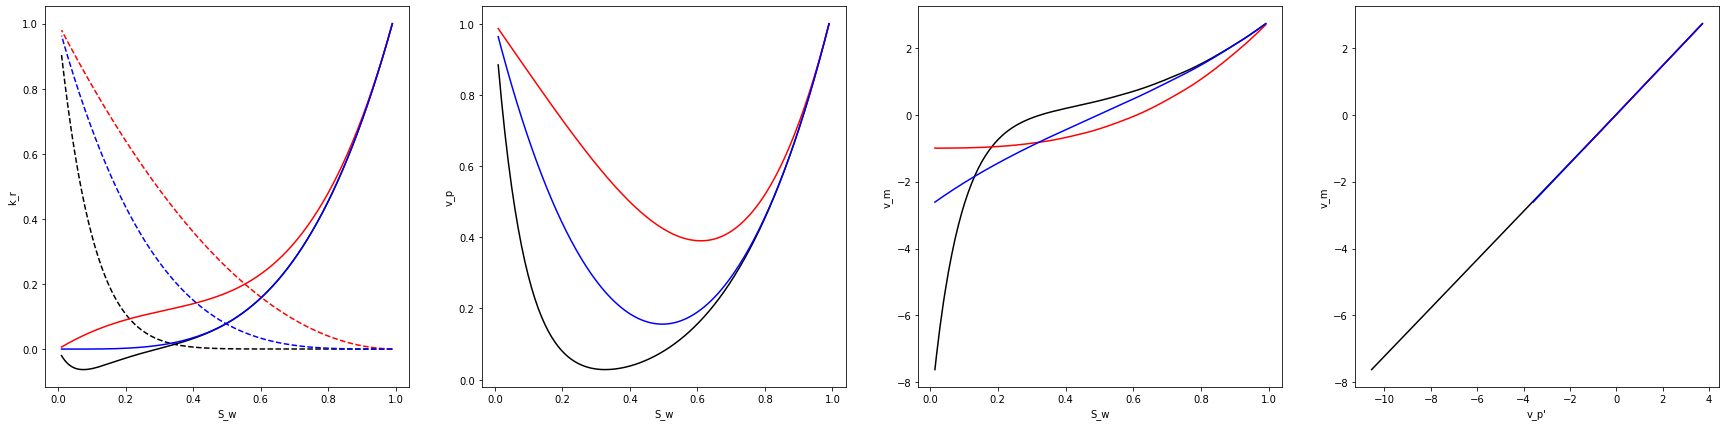

In [92]:
###

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


kr_w0 = np.array([1]) # End-point kr_w and initial value
kr_w02 = np.array([1]) # End-point kr_w and initial value
kr_w03 = np.array([1]) # End-point kr_w and initial value


b = 0.73 # n_b = 3.7 is the corresponding exp for symmetric Corey curves with a = 0.
kr_n0 = 1.0 # End-point relperm
M = 1.0 # Visc match

n_o1 = 10.0
a1 = -0.0
n_o2 = 2.0
a2 = -0.0  # TR: Assume this is symmetric around 0: a > 0 if n_o < n_b
n_o3 = 3.71
a3 = -0.0

## Corey fuctions
def krn_Corey(kr_n0, n_o, sw): return kr_n0 * (1 - sw)**n_o
def dkrn_Corey(kr_n0, n_o, sw): return -kr_n0 * n_o * (1 - sw)**(n_o - 1)

dkr_w1 = lambda sw, kr_w: 1/(1-b) * (kr_w/sw + 
                                     b*M*dkrn_Corey(kr_n0, n_o1, sw) -
                                     (M*dkrn_Corey(kr_n0, n_o1, sw) +
                                      M*krn_Corey(kr_n0, n_o1, sw)/(1-sw)) + a1)

dkr_w2 = lambda sw, kr_w: 1/(1-b) * (kr_w/sw +
                                     b*M*dkrn_Corey(kr_n0, n_o2, sw) -
                                     (M*dkrn_Corey(kr_n0, n_o2, sw) +
                                      M*krn_Corey(kr_n0, n_o2, sw)/(1-sw)) + a2)

dkr_w3 = lambda sw, kr_w: 1/(1-b) * (kr_w/sw + b*M*dkrn_Corey(kr_n0, n_o3, sw) -
                                     (M*dkrn_Corey(kr_n0, n_o3, sw) +
                                      M*krn_Corey(kr_n0, n_o3, sw)/(1-sw)) + a3)


sw_span = (0.99, 0.01)
sw_eval = np.linspace(0.99, 0.01, 200)

sol1 = solve_ivp(dkr_w1, sw_span, kr_w0, t_eval=sw_eval)
sol2 = solve_ivp(dkr_w2, sw_span, kr_w02, t_eval=sw_eval)
sol3 = solve_ivp(dkr_w3, sw_span, kr_w03, t_eval=sw_eval)

v_p1 = kr_n0*(1-sol1.t)**(n_o1) + sol1.y[0]
v_p2 = kr_n0*(1-sol2.t)**(n_o2) + sol2.y[0]
v_p3 = kr_n0*(1-sol3.t)**(n_o3) + sol3.y[0]

v_p1_diff = np.diff(v_p1) / np.diff(sol1.t)
v_p2_diff = np.diff(v_p2) / np.diff(sol2.t)
v_p3_diff = np.diff(v_p3) / np.diff(sol3.t)

v_m1 = (sol1.t[:-1] * (np.diff(sol1.y[0]/sol1.t) / np.diff(sol1.t)) + 
        (1-sol1.t[:-1]) * (np.diff(kr_n0*(1-sol1.t)**(n_o1) / (1-sol1.t)) / np.diff(sol1.t)))

v_m2 = (sol2.t[:-1] * (np.diff(sol2.y[0]/sol2.t) / np.diff(sol2.t)) + 
        (1-sol2.t[:-1]) * (np.diff(kr_n0*(1-sol2.t)**(n_o2) / (1-sol2.t)) / np.diff(sol2.t)))

v_m3 = (sol3.t[:-1] * (np.diff(sol3.y[0]/sol3.t) / np.diff(sol3.t)) + 
        (1-sol3.t[:-1]) * (np.diff(kr_n0*(1-sol3.t)**(n_o3) / (1-sol3.t)) / np.diff(sol3.t)))


#
plt.figure(figsize=(30,7))

plt.subplot(141)
plt.plot(sol1.t, sol1.y[0], 'k')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o1, '--k')
plt.plot(sol2.t, sol2.y[0], 'r')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o2, '--r')
plt.plot(sol3.t, sol3.y[0], 'b')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o3, '--b')
plt.ylabel("k_r")
plt.xlabel("S_w")


plt.subplot(142)
plt.plot(sol1.t, v_p1, color='k')
plt.plot(sol2.t, v_p2, color='r')
plt.plot(sol3.t, v_p3, color='b')
plt.ylabel("v_p")
plt.xlabel("S_w")


plt.subplot(143)
plt.plot(sol1.t[:-1], v_m1, color='k')
plt.plot(sol2.t[:-1], v_m2, color='r')
plt.plot(sol3.t[:-1], v_m3, color='b')
plt.ylabel("v_m")
plt.xlabel("S_w")


plt.subplot(144)
plt.plot(v_p1_diff, v_m1, color='k')
plt.plot(v_p2_diff, v_m2, color='r')
plt.plot(v_p3_diff, v_m3, color='b')
plt.ylabel("v_m")
plt.xlabel("v_p'")

plt.show()